In [5]:
import warnings

warnings.filterwarnings("ignore")

from src import utils
from src.outcomes import plurality_outcome
from src.outcomes import borda_outcome
from src.outcomes import for_two_outcome
from src.outcomes import veto_outcome
from src.happiness_level import HappinessLevel
from src.strategic_voting_risk import StrategicVoting
import os
import pandas as pd
import numpy as np
from src.Coalition_Compromising import find_stable_coalitions_by_compromising, coalition_dataframe
from matplotlib import pyplot as plt


In [6]:
path_voting = "input/voting_result.json"
if "env" in os.environ:
    if os.environ["env"] == "docker":
        path_voting = "/input/voting_result.json"

Analyzing veto...
Analyzing 2x2 matrix...
Analyzing 3x3 matrix...
Analyzing 4x4 matrix...
Analyzing 5x5 matrix...
Analyzing 6x6 matrix...
Analyzing 7x7 matrix...
Analyzing 8x8 matrix...
  Number_voters  voters number_manipulations strategic_voting_risk  \
0             1    (7,)                    1              0.188315   
1             1    (5,)                    1              0.188315   
2             1    (6,)                    1              0.343557   
3             1    (2,)                    1              0.382032   
4             1    (1,)                    1              0.188315   
5             2  (1, 5)                    1              0.188315   

  overall_happiness_change_inside_coalition overall_happiness_change_system  
0                                  0.188315                        0.800881  
1                                  0.188315                        0.800881  
2                                  0.343557                        0.800881  
3          

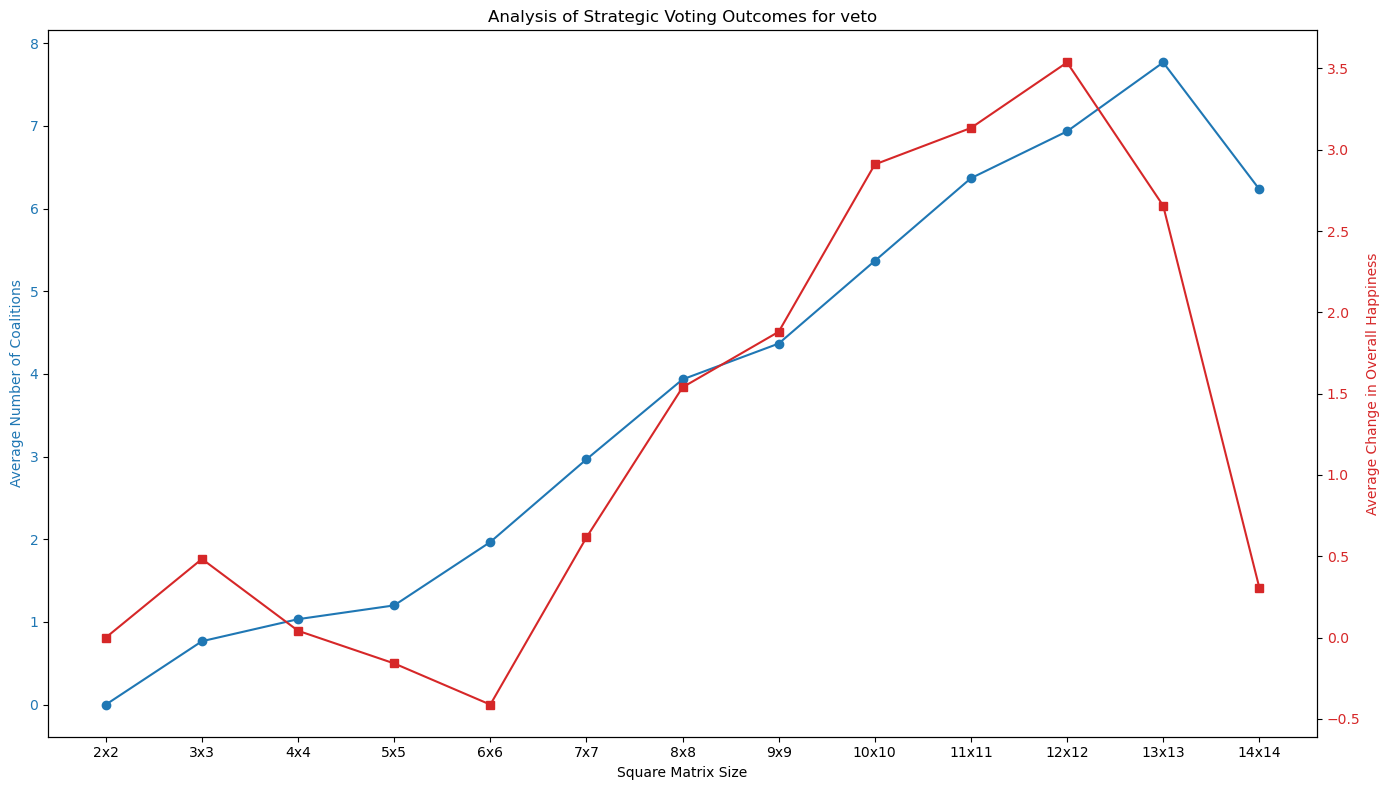

Analyzing voting_for_two...
Analyzing 2x2 matrix...
Analyzing 3x3 matrix...
Analyzing 4x4 matrix...
Analyzing 5x5 matrix...
Analyzing 6x6 matrix...
Analyzing 7x7 matrix...
Analyzing 8x8 matrix...
Analyzing 9x9 matrix...
Analyzing 10x10 matrix...
Analyzing 11x11 matrix...
Analyzing 12x12 matrix...
Analyzing 13x13 matrix...
Analyzing 14x14 matrix...


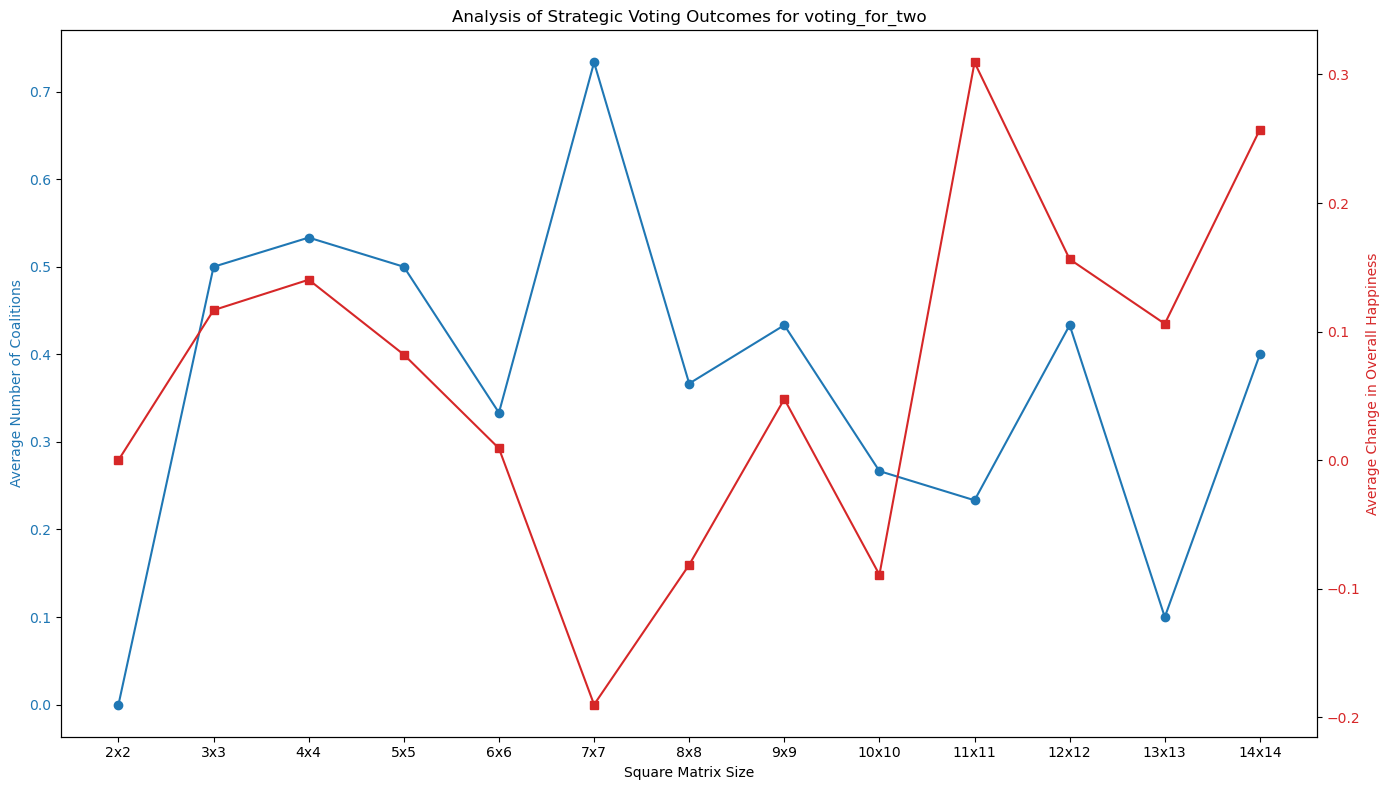

Analyzing plurality...
Analyzing 2x2 matrix...
Analyzing 3x3 matrix...
Analyzing 4x4 matrix...
Analyzing 5x5 matrix...
Analyzing 6x6 matrix...
Analyzing 7x7 matrix...
Analyzing 8x8 matrix...
Analyzing 9x9 matrix...
Analyzing 10x10 matrix...
Analyzing 11x11 matrix...
Analyzing 12x12 matrix...
Analyzing 13x13 matrix...
Analyzing 14x14 matrix...


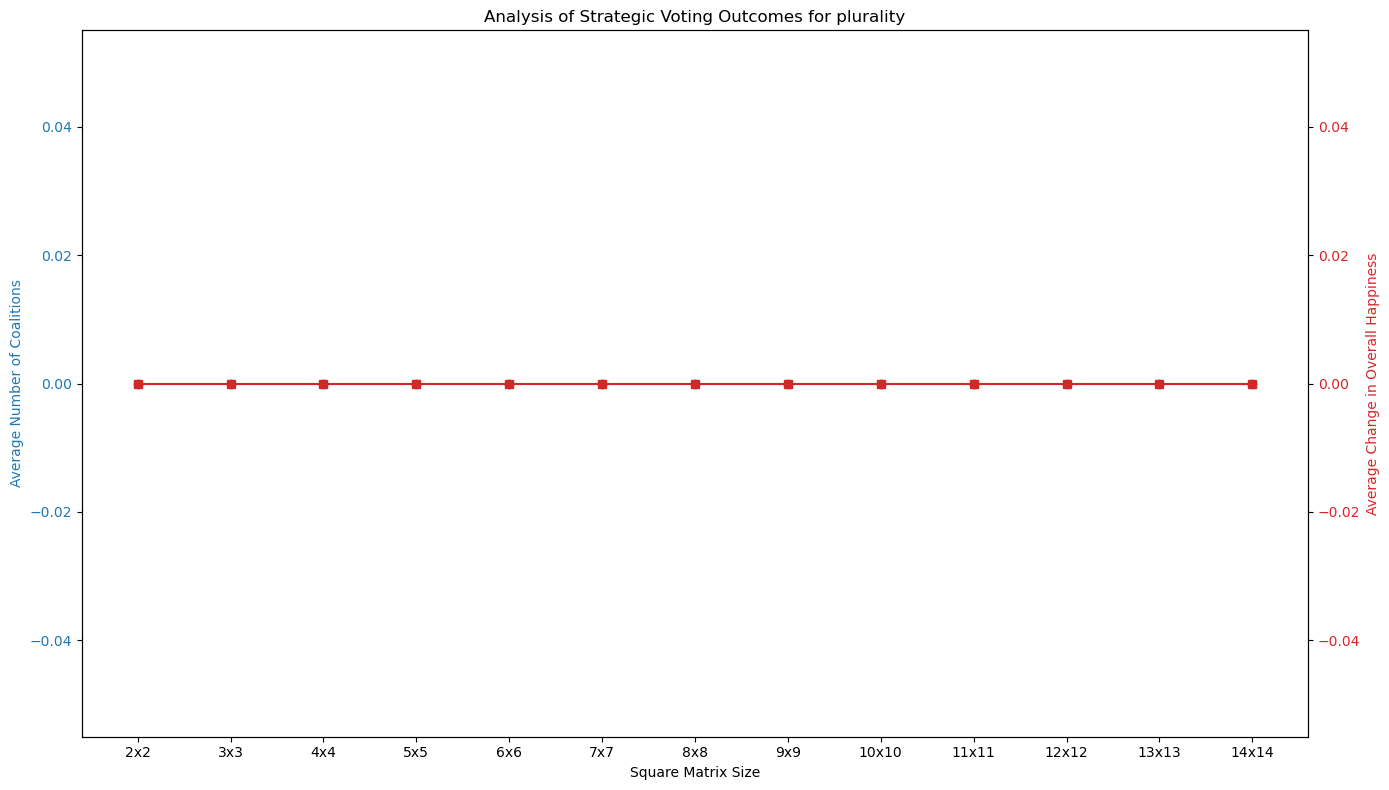

Analyzing borda...
Analyzing 2x2 matrix...
Analyzing 3x3 matrix...
Analyzing 4x4 matrix...
Analyzing 5x5 matrix...
Analyzing 6x6 matrix...
Analyzing 7x7 matrix...
Analyzing 8x8 matrix...
Analyzing 9x9 matrix...
Analyzing 10x10 matrix...
Analyzing 11x11 matrix...
Analyzing 12x12 matrix...
Analyzing 13x13 matrix...
Analyzing 14x14 matrix...


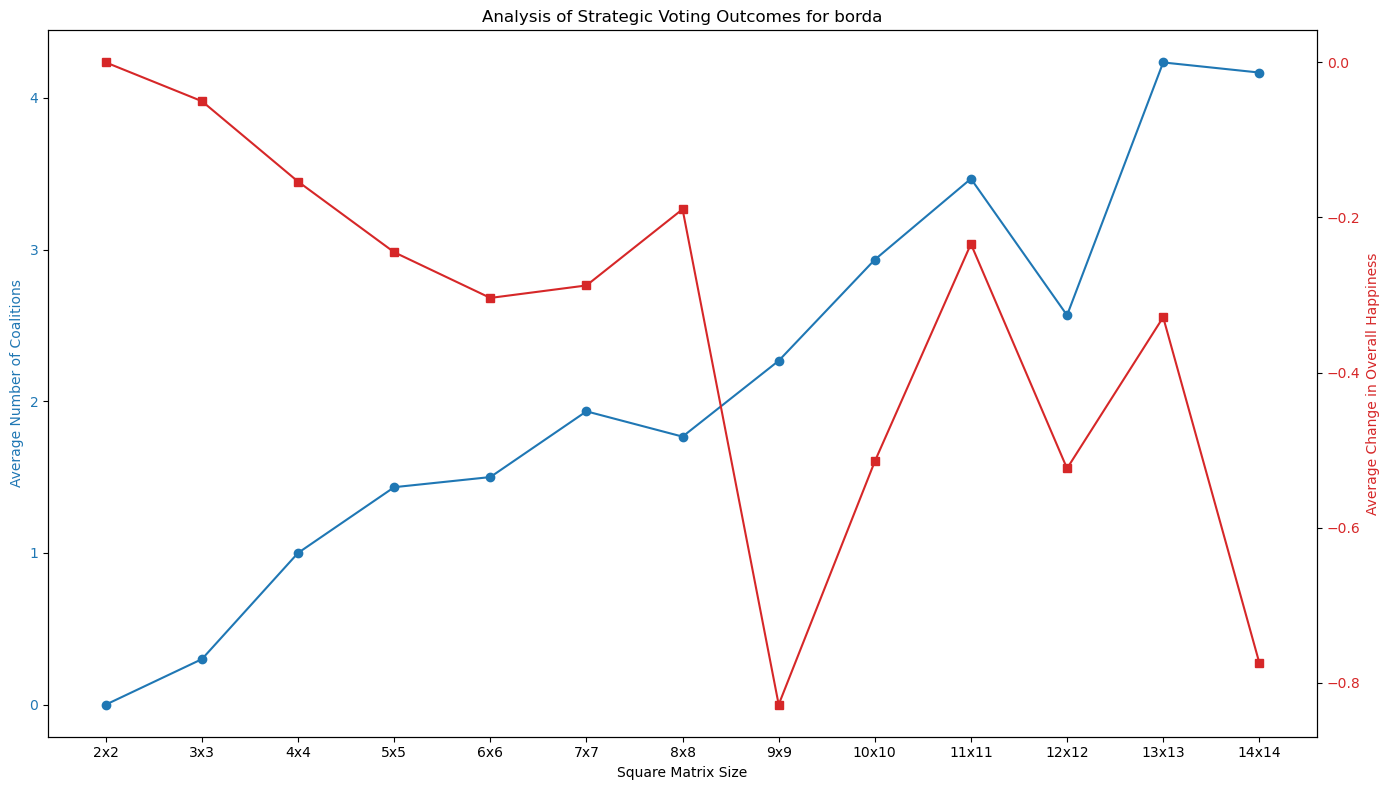

In [9]:



voting_schemes = {
    'veto' : veto_outcome,
    'voting_for_two': for_two_outcome,
    'plurality': plurality_outcome,
    'borda': borda_outcome,
   
}

num_trials = 30
square_matrix_sizes = range(2, 15)  # From 2x2 to 5x5 matrices
for scheme_name in voting_schemes:
    scheme_function=voting_schemes[scheme_name]
    average_coalitions = []
    average_happiness_changes = []
    scenarios = []
    
    print(f'Analyzing {scheme_name}...')
    for size in square_matrix_sizes:
        print(f'Analyzing {size}x{size} matrix...')

        total_coalitions = []
        total_overall_happiness_change = []
        for n_voters in [size]:
            for n_candidates in [size]:
                
                scenario_coalitions = 0
                scenario_happiness_change = 0   
                for _ in range(num_trials):
                    voting_array = utils.random_voting(n_voters, n_candidates)
                    results = scheme_function(voting_array)
                    happiness_level = HappinessLevel(voting_array, results.winner)
                    voting_df= pd.DataFrame(voting_array).T
                    valori = np.array(list(happiness_level.happiness_level_dict.values()))
                    
                    coalitions = find_stable_coalitions_by_compromising(voting_df, valori, results, voting=scheme_name, strategy = 'burying')
                    coal_df = coalition_dataframe(coalitions, voting_array, valori)

                    num_coalitions = len(coal_df.index)
                    overall_happiness_change =coal_df["overall_happiness_change_system"].sum()
                    scenario_coalitions += num_coalitions
                    scenario_happiness_change += overall_happiness_change
                
                total_coalitions.append(scenario_coalitions / num_trials)
                total_overall_happiness_change.append(scenario_happiness_change / num_trials)     

        
        average_coalitions.append(sum(total_coalitions)/len(total_coalitions))
        average_happiness_changes.append(sum(total_overall_happiness_change)/len(total_overall_happiness_change))
        scenarios.append(f'{size}x{size}')
   
    # Create subplots
    fig, ax1 = plt.subplots(figsize=(14, 8))

    # Plot for average number of coalitions
    ax1.set_xlabel('Square Matrix Size')
    ax1.set_ylabel('Average Number of Coalitions', color='tab:blue')
    ax1.plot(scenarios, average_coalitions, marker='o', color='tab:blue', label='Average Number of Coalitions')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Instantiate a second y-axis to plot average change in overall happiness
    ax2 = ax1.twinx()  
    ax2.set_ylabel('Average Change in Overall Happiness', color='tab:red')
    ax2.plot(scenarios, average_happiness_changes, marker='s', color='tab:red', label='Average Change in Overall Happiness')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Title and customizations
    plt.title(f'Analysis of Strategic Voting Outcomes for {scheme_name}')
    fig.tight_layout()
    plt.xticks(rotation=45, fontsize=10)
    plt.show()
